# 座屈の問題

In [1]:
import numpy as np
import pathfollowing as pf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set('poster', 'whitegrid', 'dark', rc={"lines.linewidth": 2, 'grid.linestyle': '-'})

## $n = 1$の場合

$$
    4x - a \sin x = 0
$$

In [2]:
def func(x, a):
    return np.array([4 * x[0] - a[0] * np.sin(x[0])])

def dfdx(x, a):
    return np.array([[4 - a[0] * np.cos(x[0])]])

def dfda(x,a):
    return np.array([[-np.sin(x[0])]])

In [3]:
x=np.array([0.0])
a=np.array([1.0])
bd,bp,lp=pf.pathfollow(x, a, func, dfdx, dfda,nmax=200, h=0.05, epsr=1.0e-10, epsb=1.0e-10, quiet=True)

$(x, a) = (0, 4)$が分岐点である

In [4]:
bd[bp[0]]

{'TY': 'B',
 'x': array([0.]),
 'a': array([4.]),
 'v': array([0., 1.]),
 'phi': array([1., 0.])}

追跡の枝を切り替える

In [5]:
v2 = pf.calcSwitchingVectorBP(bd[bp[0]], func, dfdx, dfda)
x2=bd[bp[0]]['x']
a2=bd[bp[0]]['a']
bd2,bp2,lp2=pf.pathfollow(x2, a2, func, dfdx, dfda, w=v2, nmax=110, h=-0.05, epsr=1.0e-10, epsb=1.0e-10, quiet=True)
bd3,bp3,lp3=pf.pathfollow(x2, a2, func, dfdx, dfda, w=v2, nmax=110, h=0.05, epsr=1.0e-10, epsb=1.0e-10, quiet=True)

In [6]:
bd_r = np.array([bd[m]['a'][0] for m in range(len(bd))])
bd_x = np.array([bd[m]['x'][0] for m in range(len(bd))])
bd_r2 = np.array([bd2[m]['a'][0] for m in range(len(bd2))])
bd_x2 = np.array([bd2[m]['x'][0] for m in range(len(bd2))])
bd_r3 = np.array([bd3[m]['a'][0] for m in range(len(bd3))])
bd_x3 = np.array([bd3[m]['x'][0] for m in range(len(bd3))])

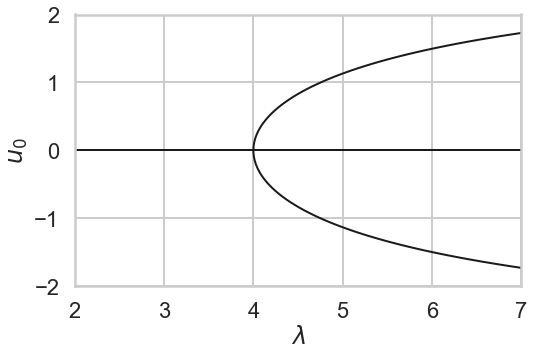

In [7]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.set_xlim(2,7)
ax.set_ylim(-2, 2)
ax.set_xlabel(r"$\lambda$")
ax.set_ylabel("$u_0$")
ax.plot(bd_r, bd_x, '-k')
ax.plot(bd_r2, bd_x2, '-k')
ax.plot(bd_r3, bd_x3, '-k')
# plt.savefig("bd_buckling1.pdf", bbox_inches='tight')

## 一般の$n$の場合（$n = 101$）

$$
\begin{aligned}
u_0 - u_1 - \frac{\lambda\Delta s^2}{2}\sin u_0 &= 0 \\
-u_{k-1} + 2 u_k - u_{k+1} - \lambda \Delta s^2 \sin u_k &= 0,\quad (1 \leq k \leq n-1),\\
-u_{n-1} + u_n - \frac{\lambda\Delta s^2}{2} \sin u_n &= 0.
\end{aligned}
$$

In [8]:
n = 101
ds = 1.0 / (n-1)

In [9]:
def func(x, a):
    n = len(x)
    A = 2 * np.identity(n)
    for m in range(n-1):
        A[m,m+1] = -2.0 if m==0 else -1.0
        A[m+1,m] = -2.0 if m==n-2 else -1.0
    return A @ x - a[0] * (ds**2) * np.sin(x)

def dfdx(x, a):
    n = len(x)
    A = 2 * np.identity(n)
    for m in range(n-1):
        A[m,m+1] = -2.0 if m==0 else -1.0
        A[m+1,m] = -2.0 if m==n-2 else -1.0
    D = np.diag(np.cos(x))
    return A - a[0] * (ds**2) * D

def dfda(x,a):
    return np.array([[-(ds**2) * np.sin(y) for y in x]])

In [11]:
x=np.zeros(n)
a=np.array([1.0])
bd,bp,lp=pf.pathfollow(x, a, func, dfdx, dfda,nmax=1000, h=0.1, epsr=1.0e-10, epsb=1.0e-10, quiet=True)

分岐点が複数現れる

In [12]:
for i in bp:
    print(i,bd[i]['a'])

89 [9.86879269]
386 [39.46543143]
880 [88.76070794]


一つ目の分岐点から切り替え

In [13]:
v02 = pf.calcSwitchingVectorBP(bd[bp[0]], func, dfdx, dfda)
x02=bd[bp[0]]['x']
a02=bd[bp[0]]['a']
bd02,bp02,lp02=pf.pathfollow(x02, a02, func, dfdx, dfda, w=v02, nmax=1000, h=0.1, epsr=1.0e-10, epsb=1.0e-10, quiet=True)

二つ目の分岐点から切り替え

In [14]:
v12 = pf.calcSwitchingVectorBP(bd[bp[1]], func, dfdx, dfda)
x12=bd[bp[1]]['x']
a12=bd[bp[1]]['a']
bd12,bp12,lp12=pf.pathfollow(x12, a12, func, dfdx, dfda, w=v12, nmax=1000, h=0.1, epsr=1.0e-10, epsb=1.0e-10, quiet=True)

三つ目の分岐点から切り替え

In [15]:
v22 = pf.calcSwitchingVectorBP(bd[bp[2]], func, dfdx, dfda)
x22=bd[bp[2]]['x']
a22=bd[bp[2]]['a']
bd22,bp22,lp22=pf.pathfollow(x22, a22, func, dfdx, dfda, w=v22, nmax=200, h=0.1, epsr=1.0e-10, epsb=1.0e-10, quiet=True)

In [16]:
bd_r = np.array([bd[m]['a'][0] for m in range(len(bd))])
bd_x = np.array([np.linalg.norm(bd[m]['x'], ord=np.inf) for m in range(len(bd))])
bd_r02 = np.array([bd02[m]['a'][0] for m in range(len(bd02))])
bd_x02 = np.array([np.linalg.norm(bd02[m]['x'], ord=np.inf) for m in range(len(bd02))])
bd_r12 = np.array([bd12[m]['a'][0] for m in range(len(bd12))])
bd_x12 = np.array([np.linalg.norm(bd12[m]['x'],ord=np.inf) for m in range(len(bd12))])
bd_r22 = np.array([bd22[m]['a'][0] for m in range(len(bd22))])
bd_x22 = np.array([np.linalg.norm(bd22[m]['x'],ord=np.inf) for m in range(len(bd22))])

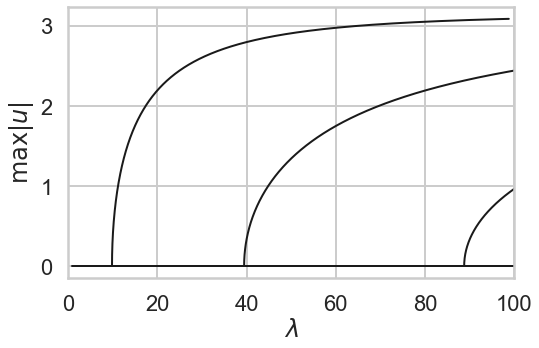

In [17]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.set_xlim(0,100)
ax.set_xlabel(r"$\lambda$")
ax.set_ylabel("$\max|u|$")
ax.plot(bd_r, bd_x, '-k')
ax.plot(bd_r02, bd_x02, '-k')
ax.plot(bd_r12, bd_x12, '-k')
ax.plot(bd_r22, bd_x22, '-k')
# plt.savefig("bd_buckling100.pdf", bbox_inches='tight')